In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Loading the dataset

In [ ]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


* Perform Below Visualizations

> 1.   Univariate Analysis
2.   Bi - Variate Analysis
3.   Multi - Variate Analysis

Univariate Analysis 



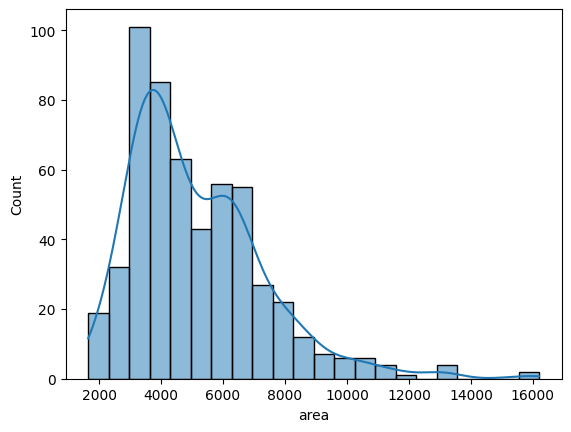

In [ ]:
# Univariate Analysis
print("Univariate Analysis \n")
sns.histplot(df['area'].dropna(), kde=True)
plt.show()

Bi-variate analysis


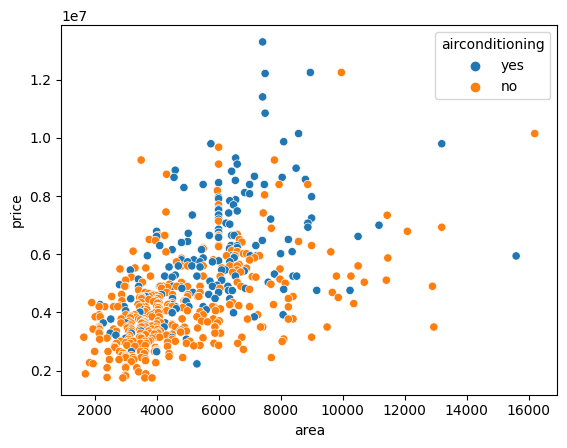

In [ ]:
print("Bi-variate analysis")
sns.scatterplot(x='area', y='price', hue='airconditioning', data=df)
plt.show()

Multi variate analysis


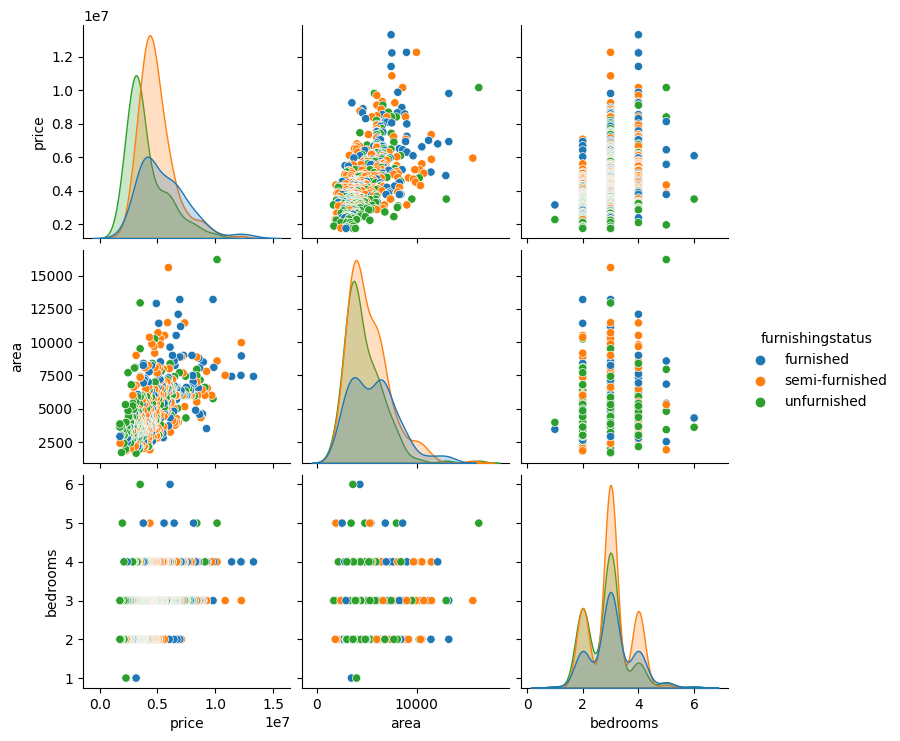

In [ ]:
print("Multi variate analysis")
sns.pairplot(df[['price', 'area', 'bedrooms', 'furnishingstatus']], hue='furnishingstatus')
plt.show()

* Perform descriptive statistics on the dataset

In [ ]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


 *  Handle the Missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [ ]:
print("No missing values")

No missing values


*  Find the outliers and replace the outliers

<Axes: >

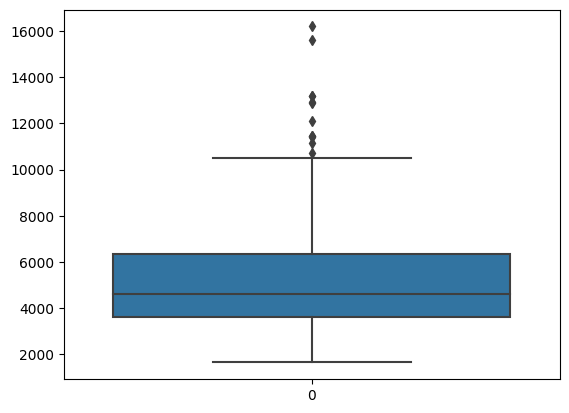

In [ ]:
sns.boxplot(df['area'])

In [ ]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

    return ls

In [ ]:
index_list = []
for feature in ["area"]:
    index_list.extend(outliers(df,feature))

index_list

[7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403]

In [ ]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df = remove(df, index_list)

<Axes: >

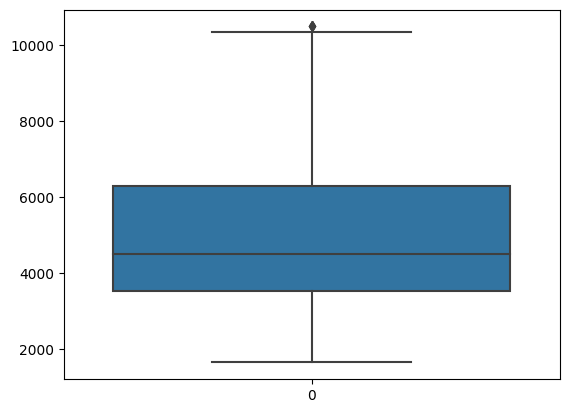

In [ ]:
sns.boxplot(df['area'])

* Check for Categorical columns and perform encoding

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


* Split the data into dependent and independent variables.


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [ ]:
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  furnishingstatus  
0                  0                1       

In [ ]:
print(y)

        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[533 rows x 1 columns]


* Scale the independent variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

* Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

* Building the model

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Reg=LinearRegression()

* Training the Model

In [ ]:
Linear_Reg.fit(X_train, y_train)

LinearRegression()

* Testing the Model

In [ ]:
y_pred = Linear_Reg.predict(X_test)

* Measuring the performance using metrics

In [ ]:
print(Linear_Reg.score(X_test, y_test))

0.5943772824986375


In [ ]:
print("intercept =",Linear_Reg.intercept_)
print("slope =",Linear_Reg.coef_)

intercept = [1956594.34977566]
slope = [[2765016.00721508  607942.83225928 2790804.04877253 1352129.99364158
   461336.63584499  529800.22260269  358301.29098218  265052.55813961
   814785.76104347  553384.09848506 -331676.12533091]]
